# IMPORTATION DES PACKAGES

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


# CHARGEMENT DES IMAGES

In [3]:
print("Répertoire courant :", os.getcwd())

targets = []
features = []


cat_files = glob.glob('dogs_vs_cats/train/cats/*.jpg')
dog_files = glob.glob('dogs_vs_cats/train/dogs/*.jpg')

print(f"{len(cat_files)} images de chats trouvées.")
print(f"{len(dog_files)} images de chiens trouvées.")


Répertoire courant : C:\Users\User\PRO_EN_IA
10000 images de chats trouvées.
10000 images de chiens trouvées.


# TRAITEMENT D'IMAGES

### LES CHATS

In [4]:

for file in cat_files:
    try:
        image = Image.open(file).resize((75, 75))
        features.append(np.array(image))
        targets.append([1, 0])  # [chat, chien]
    except Exception as e:
        print(f"Erreur avec {file} : {e}")

## LES CHIENS

In [5]:
for file in dog_files:
    try:
        image = Image.open(file).resize((75, 75))
        features.append(np.array(image))
        targets.append([0, 1])  # [chat, chien]
    except Exception as e:
        print(f"Erreur avec {file} : {e}")

## Conversion en tableaux numpy

In [6]:
features = np.array(features)
targets = np.array(targets)

print("features shape:", features.shape)
print("targets shape:", targets.shape)


features shape: (20000, 75, 75, 3)
targets shape: (20000, 2)


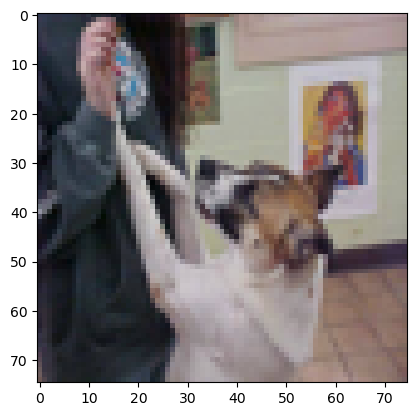

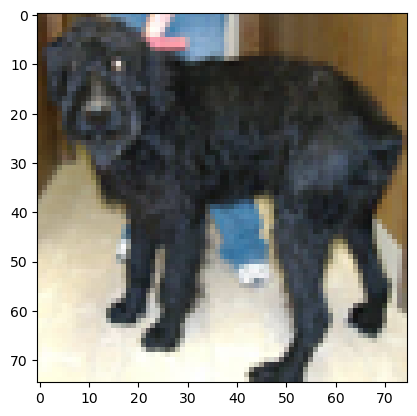

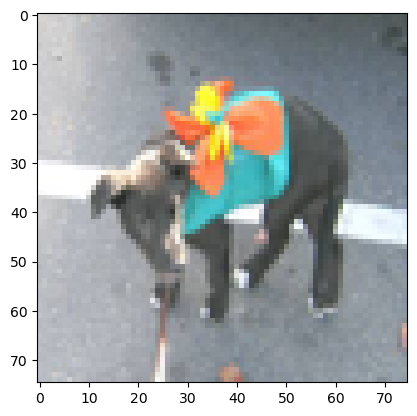

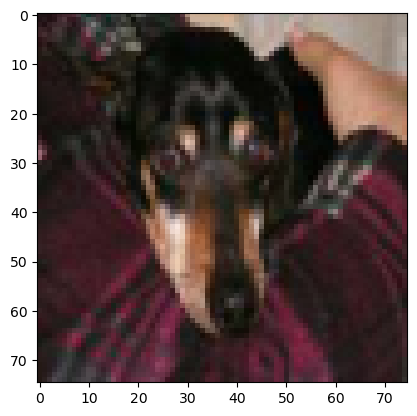

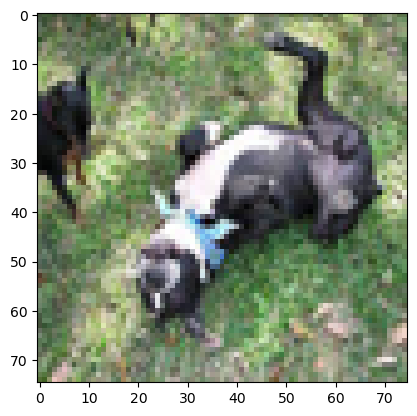

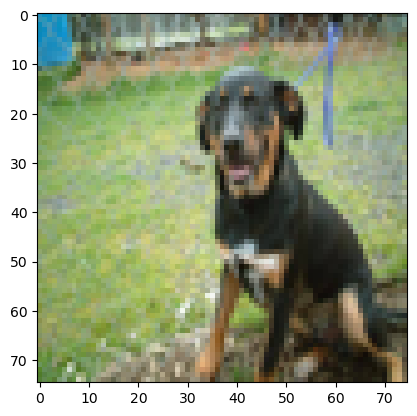

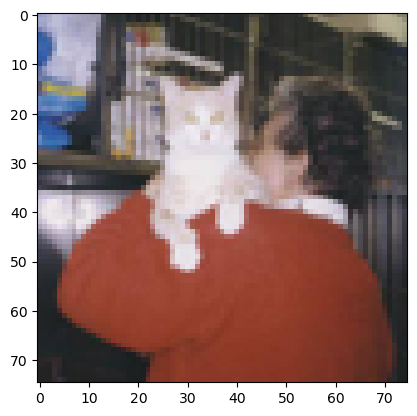

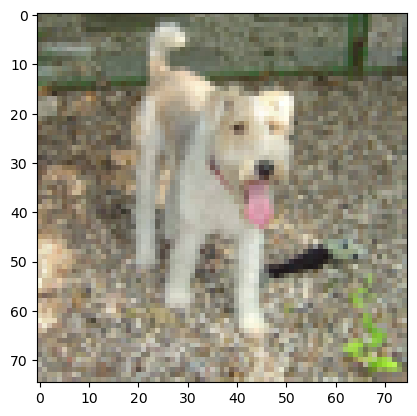

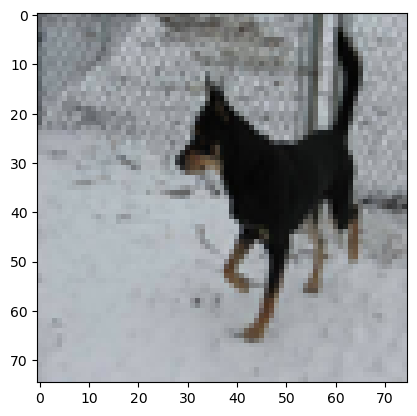

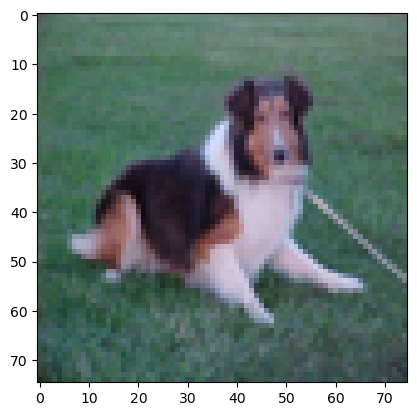

In [7]:
from random import randint

for a in [randint(0, len(features)) for _ in range(10)]:
    plt.imshow(features[a], cmap="gray")
    plt.show()

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.05, random_state=42)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (19000, 75, 75, 3)
X_valid.shape (1000, 75, 75, 3)
y_train.shape (19000, 2)
y_valid.shape (1000, 2)


# CONCEPTION DU MODELE

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

## Modèle CNN

In [10]:
# Modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # 2 classes : chat ou chien
])

C:\Users\User\anaconda3\envs\bac4IA_pro_en_IA\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compulation du modèle

In [11]:
# Compilation
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Résumé du modèle
model.summary()

# Entraînement
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=10,
    batch_size=32
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,450 (3.42 MB)

 Trainable params: 896,450 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 49s 77ms/step - accuracy: 0.5301 - loss: 2.0212 - val_accuracy: 0.5990 - val_loss: 0.6754
Epoch 2/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.5666 - loss: 0.6774 - val_accuracy: 0.6270 - val_loss: 0.6588
Epoch 3/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.5925 - loss: 0.6573 - val_accuracy: 0.6650 - val_loss: 0.6384
Epoch 4/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 82s 72ms/step - accuracy: 0.6191 - loss: 0.6436 - val_accuracy: 0.6810 - val_loss: 0.6235
Epoch 5/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.6377 - loss: 0.6254 - val_accuracy: 0.7040 - val_loss: 0.5717
Epoch 6/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 43s 72ms/step - accuracy: 0.6815 - loss: 0.5864 - val_accuracy: 0.6910 - val_loss: 0.5627
Epoch 7/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.7057 - loss: 0.5613 - val_accuracy: 0.7450 - val_loss: 0.5132
Epoch 8/10
594/594 ━━━━━━━━━━━━━━━━━━━━ 41s 69ms/step - accuracy: 0.7345 - loss: 0.5261 - 

# PREDICTION

In [27]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import load_img, img_to_array


def predict_image(image_path):
    # Charger l'image
    img = load_img(image_path, target_size=(75, 75))  # Redimensionner l'image
    img_array = img_to_array(img)  # Convertir l'image en tableau
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension

    # Normaliser l'image
    img_array /= 255.0

    # Faire la prédiction
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]  # Obtenir l'index de la classe

    # Retourner le résultat
    return 'Chat' if class_idx == 0 else 'Chien'

# Exemple d'utilisation
# (Assurez-vous d'entraîner le modèle avant d'utiliser cette fonction)
image_path = 'dogs_vs_cats/test/dogs/dog.11463.jpg'  # Remplacez par le chemin de votre image
result = predict_image(image_path)
print(f'La prédiction est : {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
La prédiction est : Chien


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


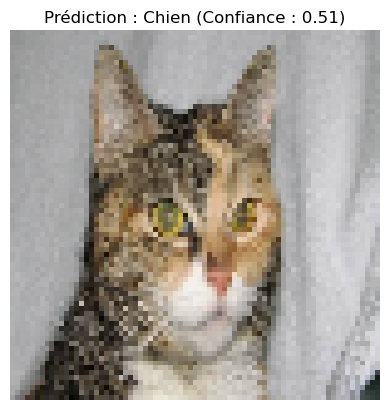

In [32]:
def predict_image(image_path):
    # Charger l'image
    img = load_img(image_path, target_size=(75, 75))  # Redimensionner l'image
    img_array = img_to_array(img)  # Convertir l'image en tableau
    img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension

    # Normaliser l'image
    img_array /= 255.0

    # Faire la prédiction
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]  # Obtenir l'index de la classe
    confidence = np.max(prediction)  # Taux de confiance

    # Retourner le résultat
    label = 'Chat' if class_idx == 0 else 'Chien'
    return label, confidence, img

# Exemple d'utilisation
image_path = 'dogs_vs_cats/train/cats/cat.10006.jpg'  # Remplacez par le chemin de votre image
result, confidence, original_image = predict_image(image_path)

# Afficher l'image et le taux de prédiction
plt.imshow(original_image)
plt.axis('off')  # Pas d'axes
plt.title(f'Prédiction : {result} (Confiance : {confidence:.2f})')
plt.show()